In [63]:
import numpy as np
from numpy.lib.function_base import cov
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

start_period = '2006-12-01'
end_period = '2019-12-31'
yesterday = '2018-12-31' # day before the creation of the portfolio

from init import download_data, plot_line, plot_hist, plot_box

In [64]:
dataframes = download_data(stocks = ["AAPL", "NVDA", "KO", "UL", "BAC", "AXP"], start_stream = start_period)

[] downloading AAPL	 -> Done
[] downloading NVDA	 -> Done
[] downloading KO	 -> Done
[] downloading UL	 -> Done
[] downloading BAC	 -> Done
[] downloading AXP	 -> Done


In [65]:
chart = pd.DataFrame()
# adj closes fino a yesterday
for s in ["AAPL", "NVDA", "KO", "UL", "BAC", "AXP"]:
    chart = pd.concat([chart, dataframes[s]['Adj Close'].loc[:yesterday,]], axis = 1)
chart.columns = ["AAPL", "NVDA", "KO", "UL", "BAC", "AXP"]
chart

,AAPL,NVDA,KO,UL,BAC,AXP
2006-12-01,2.813474,21.783953,15.150160,16.652302,41.017490,46.428661
2006-12-04,2.807312,22.666592,15.234750,16.714455,40.365829,47.491245
2006-12-05,2.811934,22.433672,15.615374,16.801485,40.473164,47.459526
2006-12-06,2.767568,22.403027,15.738990,16.664724,40.396488,47.316799
2006-12-07,2.681610,21.863636,15.849599,16.757973,40.243156,46.920311
...,...,...,...,...,...,...
2018-12-24,35.854492,126.377098,43.074390,47.840046,21.643925,86.356644
2018-12-26,38.379425,132.363815,43.992859,48.928814,22.957989,90.544220
2018-12-27,38.130344,130.444458,44.545818,48.956970,23.205563,91.354729
2018-12-28,38.149883,132.910767,44.236538,48.825565,23.224607,91.103851


In [66]:
# compute montly (default value = 'M') cc return 
aggregation = "Y"
chart_rt = {}
for s in chart:
    tmp = chart[s].groupby(pd.Grouper(freq = aggregation))
    tmp2 = tmp.mean()
    chart_rt[s] = np.log(tmp2/tmp2.shift(1))
chart_rt = pd.DataFrame.from_dict(chart_rt)
chart_rt = chart_rt.dropna()
chart_rt.columns = ["AAPL CC returns", "NVDA CC returns", "KO CC returns", "UL CC returns", "BAC CC returns", "AXP CC returns"]
chart_rt


,AAPL CC returns,NVDA CC returns,KO CC returns,UL CC returns,BAC CC returns,AXP CC returns
2007-12-31,0.394353,0.119233,0.116790,0.154409,-0.049739,-0.014590
2008-12-31,0.101511,-0.553134,0.024199,-0.052182,-0.420252,-0.433279
2009-12-31,0.033488,-0.296782,-0.063370,-0.114014,-0.858238,-0.306307
2010-12-31,0.570908,0.134957,0.179476,0.195122,0.176036,0.454025
2011-12-31,0.337090,0.219218,0.193387,0.126693,-0.378932,0.147365
2012-12-31,0.461452,-0.222650,0.134436,0.126912,-0.165687,0.180113
2013-12-31,-0.177950,0.066357,0.095691,0.191965,0.469109,0.276498
2014-12-31,0.336138,0.287236,0.058823,0.078054,0.198597,0.219651
2015-12-31,0.280119,0.263427,0.040229,0.050668,0.024875,-0.128881
2016-12-31,-0.117122,0.832395,0.085988,0.058334,-0.057347,-0.182817


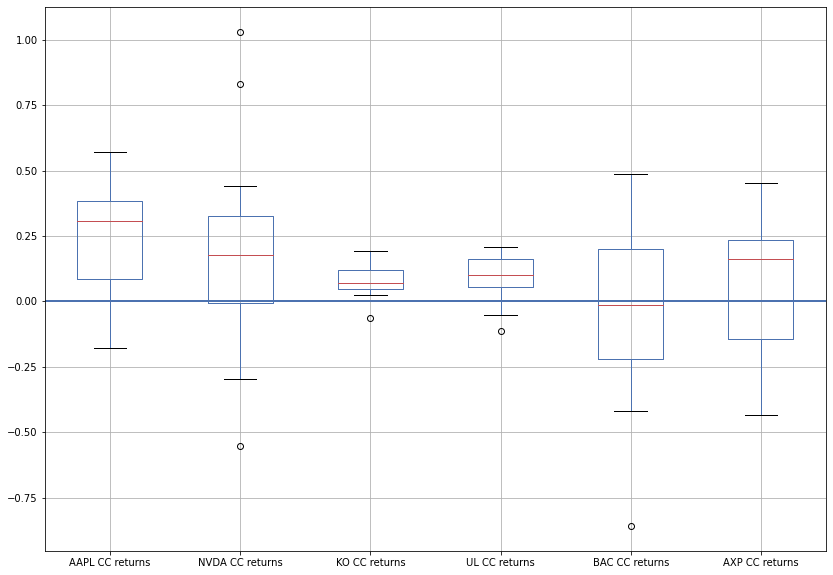

In [67]:
plt.figure(figsize = (14, 10))
chart_rt.boxplot(column=list(chart_rt.columns))
plt.axhline(y = 0, linewidth = 2)
plt.show()

In [68]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [69]:
# adding transition costs (1,5% fee per share)
chart = chart.apply(lambda x: x + (x * 0.015))

display(chart)

,AAPL,NVDA,KO,UL,BAC,AXP
2006-12-01,2.855676,22.110712,15.377412,16.902086,41.632753,47.125091
2006-12-04,2.849421,23.006591,15.463271,16.965171,40.971317,48.203614
2006-12-05,2.854113,22.770177,15.849604,17.053507,41.080261,48.171419
2006-12-06,2.809081,22.739072,15.975075,16.914695,41.002436,48.026551
2006-12-07,2.721835,22.191591,16.087343,17.009342,40.846804,47.624116
...,...,...,...,...,...,...
2018-12-24,36.392310,128.272755,43.720506,48.557647,21.968584,87.651993
2018-12-26,38.955116,134.349273,44.652752,49.662746,23.302359,91.902383
2018-12-27,38.702300,132.401125,45.214006,49.691325,23.553646,92.725050
2018-12-28,38.722132,134.904428,44.900086,49.557949,23.572977,92.470409


In [70]:
# Optimal portfolio

# computes CC return on year granularity
avg_returns = expected_returns.mean_historical_return(chart)
print('-- avg_returns: ')
print(avg_returns)
# sample covariance matrix 
S = risk_models.sample_cov(chart)
print('\n-- S: ')
display(S)
ef = EfficientFrontier(avg_returns, S)

-- avg_returns: 
AAPL    0.242324
NVDA    0.161685
KO      0.093209
UL      0.093699
BAC    -0.045263
AXP     0.058320
dtype: float64

-- S: 


,AAPL,NVDA,KO,UL,BAC,AXP
AAPL,0.099740,0.064613,0.018267,0.024271,0.065925,0.052104
NVDA,0.064613,0.227877,0.025889,0.032818,0.091343,0.073693
KO,0.018267,0.025889,0.032080,0.019043,0.030290,0.027866
UL,0.024271,0.032818,0.019043,0.052281,0.044754,0.037837
BAC,0.065925,0.091343,0.030290,0.044754,0.296558,0.138885
AXP,0.052104,0.073693,0.027866,0.037837,0.138885,0.138490


Expected annual return: 10.8%
Annual volatility: 16.6%
Sharpe Ratio: 0.53

Weights:
AAPL	-> 0.09661
NVDA	-> 0.0
KO	-> 0.6614
UL	-> 0.24199
BAC	-> 0.0
AXP	-> 0.0


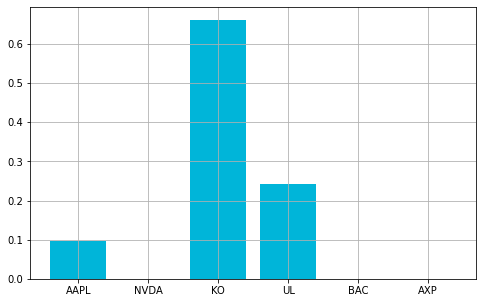

In [71]:
# Minimize the volatily of the portfolio (Markowitz)
weights = ef.min_volatility()
# rounding weights values, meaning they may not add up exactly to 1 but should be close
weights = ef.clean_weights()

Mop_pw = weights

opt_return, opt_risk, _ = ef.portfolio_performance(verbose=True)

# raw data:
# print(f'Optimal Return: {opt_return}')
# print(f'Optimal Risk: \t{opt_risk}')
# print('Weights stocks:')
print('\nWeights:')
for w in weights:
    print(w + '\t-> ' + str(weights[w]))
# print(f'Weights stocks: {weights}')


w = pd.DataFrame.from_dict(weights, orient='index')
w.columns = ['weight']
plt.figure(figsize = (8, 5))
plt.bar(w.index, w['weight'], color = '#00b5d9')
plt.grid()
# plt.savefig('img_portfolio/'+ str(0) + '-weights.png', dpi=300)
plt.show()

In [72]:
from pypfopt import cla
from pypfopt.plotting import plot_efficient_frontier

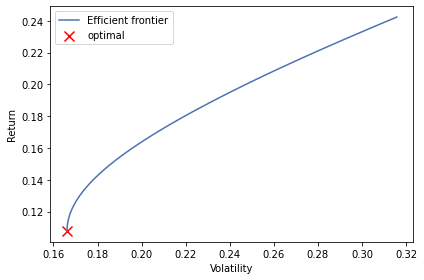

In [73]:
# Markowitz
ef = cla.CLA(avg_returns, S) 
ef.min_volatility() # Markowitz
optimal_ret, optimal_risk, _ = ef.portfolio_performance()
plot_efficient_frontier(ef, show_assets=False)
# plt.savefig('img_portfolio/'+ str(1) + '-efficient_frontier.png', dpi=300)

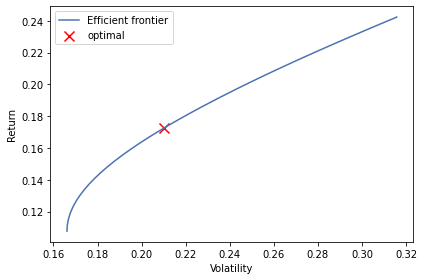

In [74]:
# Sharpe Ratio
ef = cla.CLA(avg_returns, S) 
ef.max_sharpe() # Sharpe Ratio
optimal_ret, optimal_risk, _ = ef.portfolio_performance()
plot_efficient_frontier(ef, show_assets=False)
plt.show()

In [75]:
max_budget = 10000

recap = {}

print('Composizione portfolio Markowitz: ')
for s in weights:
    recap[s] = [int(np.floor(max_budget * weights[s]/chart[s].iloc[-1]))] # number of shares
    price_no_fee = np.round(chart[s].iloc[-1] - (chart[s].iloc[-1] * 1.5 / 101.5), decimals = 2)
    recap[s].append(price_no_fee) # price for each shares
    recap[s].append(price_no_fee * 0.015) # transaction costs 1,5%
    tot_cost = np.around(recap[s][0] * (recap[s][1] + recap[s][2]), decimals = 2)
    recap[s].append(tot_cost) # total cost of the investment in s (shares * (price for each s + transaction costs))

recap = pd.DataFrame.from_dict(recap, orient='index')
recap.columns = ['Num of shares', 'Price for each share $', 'Transaction costs $', 'Purchase cost $']
display(recap)

total = 0
for _, row in recap.iterrows():
    total += row['Purchase cost $']

total = np.around(total, decimals = 2)
print('The total spent on the investment is ' + str(total) + "$")
print('You have ' + str(np.around(max_budget - total, decimals = 2))  + '$ left')

Composizione portfolio Markowitz: 


,Num of shares,Price for each share $,Transaction costs $,Purchase cost $
AAPL,24,38.52,0.57780,938.35
NVDA,0,132.76,1.99140,0.00
KO,146,44.38,0.66570,6576.67
UL,48,49.04,0.73560,2389.23
BAC,0,23.46,0.35190,0.00
AXP,0,91.97,1.37955,0.00


The total spent on the investment is 9904.25$
You have 95.75$ left


In [76]:
# buy and hold (1 year, from yesterday to end_period)
# l = 12m

price_end = {}
tot_port = 0
for s in dataframes:
    price_end[s] = dataframes[s]['Adj Close'].loc[end_period]

act_return = 0
for index, row in recap.iterrows():
    tot_port += np.around(row['Num of shares'] * (price_end[index] + row['Transaction costs $']), decimals = 2)
    rtn = (price_end[index] + row['Transaction costs $'])/recap.loc[index,'Price for each share $'] - 1
    act_return += weights[index] * rtn

print('You started with ' + str(total)+ "$")
print('The investment value is now equal to ' + str(np.around(tot_port, decimals = 2)) + "$")

print('Stonks') if (total < tot_port) else print('Not stonks')


print(f'Expected return Mop:\t {opt_return} [{np.round(100*opt_return, decimals = 2)}%]')
print(f'Actual return Mop:\t {act_return} [{np.round(100*act_return, decimals = 2)}%]')

You started with 9904.25$
The investment value is now equal to 12363.99$
Stonks
Expected return Mop:	 0.10773336152248808 [10.77%]
Actual return Mop:	 0.2682962246597827 [26.83%]


In [77]:
# CAPM

def beta_calc(stock, market_index):
    beta = stock.cov(market_index) / market_index.var()
    return beta

def c_beta_calc(stocks, market_index, delta_t = 18):
    length_period = market_index.shape[0] # length period for the stock's time series
    start = delta_t # default: first month after the 20 months to calculate the first value of beta
    
    betas = {}
    ccrs = {}
    for s in stocks:
        ccrs[s] = compute_CCreturns(dataframes[s])
        betas[s] = pd.Series(dtype = 'float64') # riempio con serie vuote per poi effettuare la concatenazione
        
    for i in range(start, length_period):
        for s in stocks:
            value = beta_calc(ccrs[s][i - delta_t:i - 1], market_index[i - delta_t:i - 1])
            serie = pd.Series([value], index = ccrs[s].index[[i]])
            betas[s] = pd.concat([betas[s], serie], axis = 0)

    return betas


market_index_name = "^GSPC" # S&P 500
market_index = compute_CCreturns(download_data(stocks = [market_index_name], start_stream = start_period)[market_index_name])
betas = c_beta_calc(["AAPL", "NVDA", "KO", "UL", "BAC", "AXP"], market_index)
betas = pd.DataFrame(betas).loc[yesterday:end_period,]


df_adj = market_index
df_adj_op = df_adj.groupby(pd.Grouper(freq = 'M'))  # aggregation (default: monthly)
df_adj = df_adj_op.mean()   # aggregate with avg
df_returns = np.log(df_adj/df_adj.shift(1)) # calculating CC returns
df_returns.name = 'market index returns'
df_returns.dropna()

rm = df_returns.loc[yesterday:end_period,].dropna().mean() * 12
# monthly aggregation -> 12 times in 1 year
er = {}
for s in betas:
    rf = 0.01 # risk free
    beta_m = betas[s].mean()
    # print(f'The mean of beta for {s} is {}')
    # er = rm + (beta_m * (rm-rf))
    er[s] = beta_m * (rm - rf) + rm
    print(f'Expected return based on CAPM for {s} is {er[s]}')

# simulating portfolio returns on CAPM predictions
sim_capm = 0
for w in weights:
    sim_capm += er[w] * weights[w]

print(f'\nExpected portfolio return based on CAPM: {sim_capm}')

[] downloading ^GSPC	 -> Done
Expected return based on CAPM for AAPL is 12.257419346752751
Expected return based on CAPM for NVDA is 17.814688911181953
Expected return based on CAPM for KO is 4.988017409350459
Expected return based on CAPM for UL is 5.88091542051119
Expected return based on CAPM for BAC is 10.941229870415636
Expected return based on CAPM for AXP is 8.13592355080651

Expected portfolio return based on CAPM: 5.906386720243679


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
